# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diambil dari Kaggle dengan nama [Mobile Price Predictions](https://www.kaggle.com/datasets/navjotkaushal/mobile-price-classification-dataset)

2. **Jumlah Baris dan Kolom Data**:  
   2000 baris dan 21 kolom data

3. **Deskripsi Dataset**:  
   Dataset berisi informasi mengenai spesifikasi-spesifikasi handphone mulai dari kapasitas baterai, konektivitas, penyimpanan dan lain-lain hingga kelompok harga handphone.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [30]:
#Type your code here
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [31]:
#Type your code here
DATA_ROOT_PATH = '../data'
data_path = os.path.join(DATA_ROOT_PATH, 'Mobile.csv')

df = pd.read_csv(data_path)
df.head()

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842 mAh,No,2.2,No,1 pixels,No,7 gb,0.6 cm,188 g,2,...,20 ppcm,756 ppcm,2549 mb,9 cm,7 cm,19,No,No,Yes,Medium cost
1,1021 mAh,Yes,0.5,Yes,0 pixels,Yes,53 gb,0.7 cm,136 g,3,...,905 ppcm,1988 ppcm,2631 mb,17 cm,3 cm,7,Yes,Yes,No,High cost
2,563 mAh,Yes,0.5,Yes,2 pixels,Yes,41 gb,0.9 cm,145 g,5,...,1263 ppcm,1716 ppcm,2603 mb,11 cm,2 cm,9,Yes,Yes,No,High cost
3,615 mAh,Yes,2.5,No,0 pixels,No,10 gb,0.8 cm,131 g,6,...,1216 ppcm,1786 ppcm,2769 mb,16 cm,8 cm,11,Yes,No,No,High cost
4,1821 mAh,Yes,1.2,No,13 pixels,Yes,44 gb,0.6 cm,141 g,2,...,1208 ppcm,1212 ppcm,1411 mb,8 cm,2 cm,15,Yes,Yes,No,Medium cost


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Battery_power_mAh        2000 non-null   object 
 1   Bluetooh                 2000 non-null   object 
 2   Speed_of_microprocessor  2000 non-null   float64
 3   Dual_sim                 2000 non-null   object 
 4   Front_camera             2000 non-null   object 
 5   4G                       2000 non-null   object 
 6   Internal_memeory_gb      2000 non-null   object 
 7   Mobile_depth             2000 non-null   object 
 8   Mobile_weight            2000 non-null   object 
 9   Cores_of_processor       2000 non-null   int64  
 10  Primary_camera           2000 non-null   object 
 11  px_height                2000 non-null   object 
 12  Pixel_width              2000 non-null   object 
 13  Ram_mb                   2000 non-null   object 
 14  Screen_height           

## **Pembersihan Data Terinput**

Menghapus komponen teks pada setiap kolom yang seharusnya numerik. Lalu  mengubah ke tipe data yang benar.

In [33]:
obj_cols = df.select_dtypes(include='object')

print('Kolom-kolom object:')
obj_cols.columns.tolist()

Kolom-kolom object:


['Battery_power_mAh',
 'Bluetooh',
 'Dual_sim',
 'Front_camera',
 '4G',
 'Internal_memeory_gb',
 'Mobile_depth',
 'Mobile_weight',
 'Primary_camera',
 'px_height',
 'Pixel_width',
 'Ram_mb',
 'Screen_height',
 'Screen_weight',
 '3G',
 'touch_screen',
 'wifi',
 'price_range']

In [34]:
col_with_digit = []

for col in obj_cols:
    # Memgambil sample data pada setiap kolom, baris pertama
    first_row = df[col].iloc[0]
    # Jika ditemukan data dengan nilai numerik didalamnya
    if re.search(r'\d+', first_row):
        # Simpan nama col
        col_with_digit.append(col)
        # Maka menyisakan nilai numerik itu, dan hapus teks non numerik
        df[col] = df[col].str.replace(r'\D+', '', regex=True)
    else:
        continue

### Hasil Pembersihan Data Terinput

In [35]:
df[col_with_digit].head()

,Battery_power_mAh,Front_camera,Internal_memeory_gb,Mobile_depth,Mobile_weight,Primary_camera,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight
0,842,1,7,06,188,2,20,756,2549,9,7
1,1021,0,53,07,136,6,905,1988,2631,17,3
2,563,2,41,09,145,6,1263,1716,2603,11,2
3,615,0,10,08,131,9,1216,1786,2769,16,8
4,1821,13,44,06,141,14,1208,1212,1411,8,2


## Ubah Tipe Data

In [36]:
df[col_with_digit] = df[col_with_digit].astype('float64')

## Visualisasi Distribusi Data

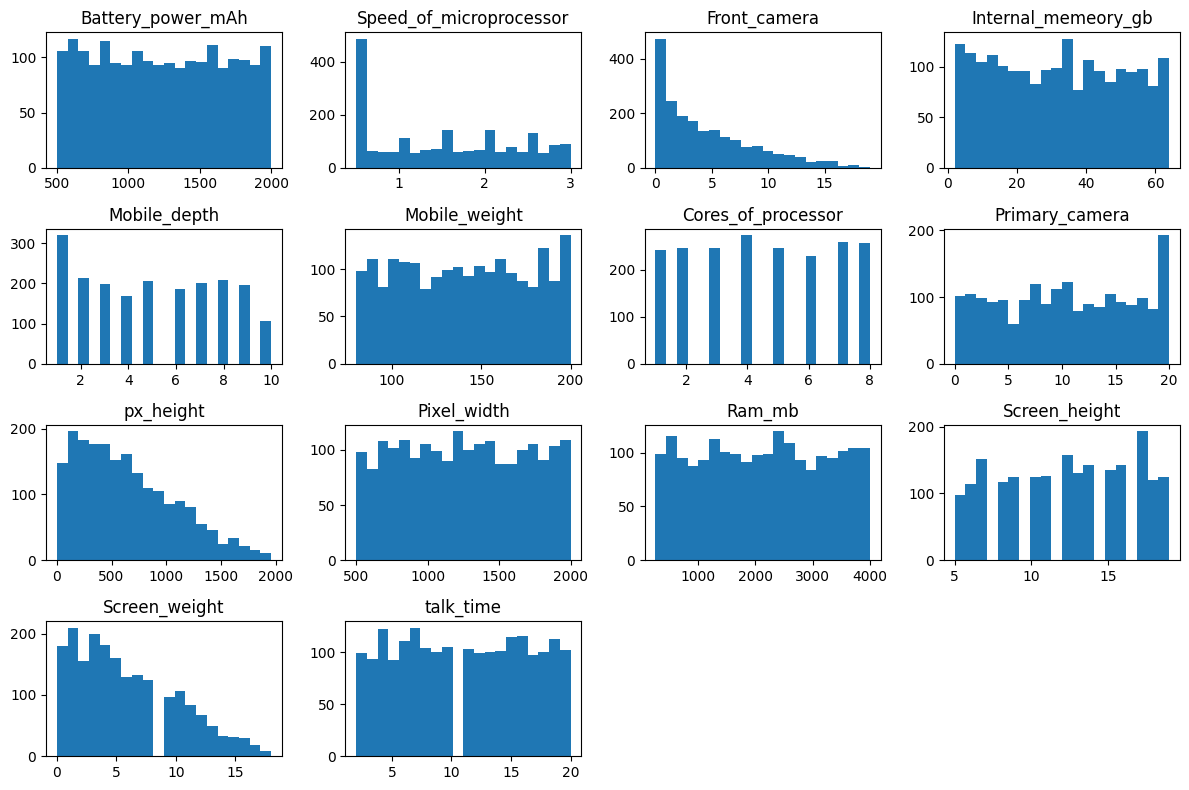

In [37]:
#Type your code here
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(bins=20, figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

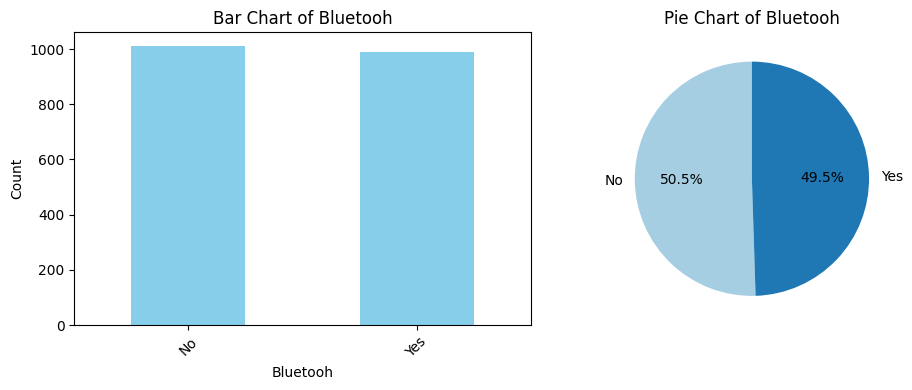

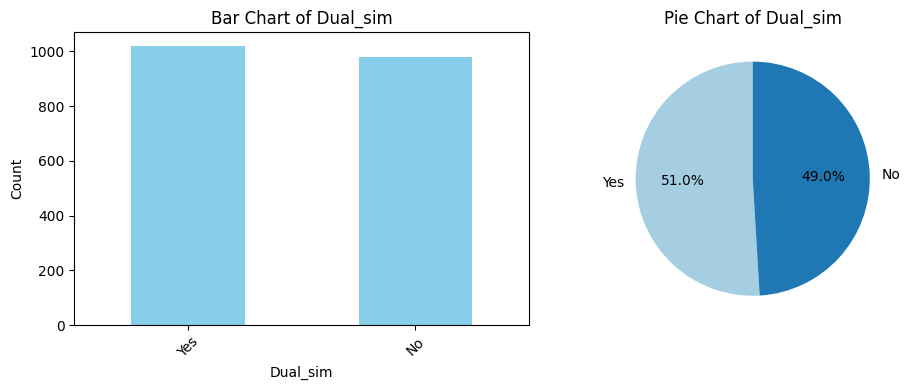

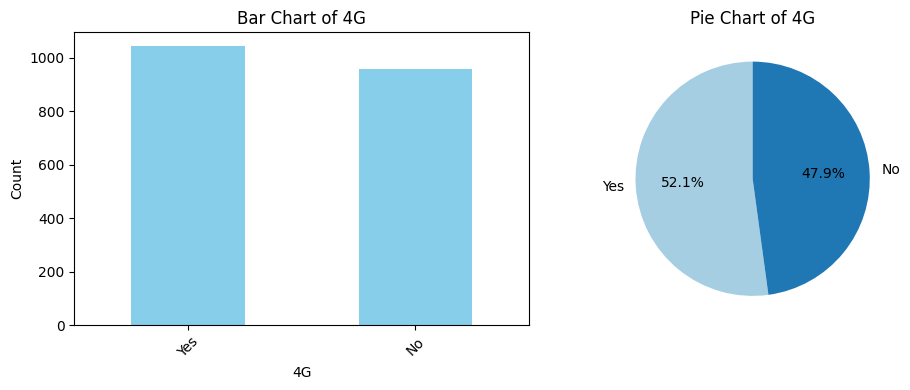

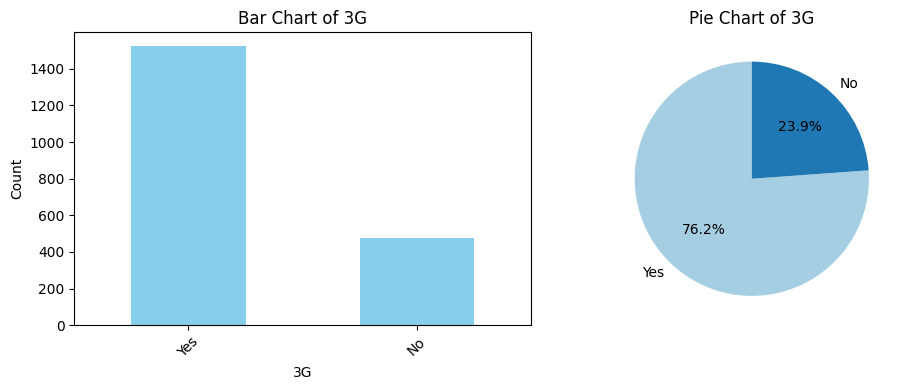

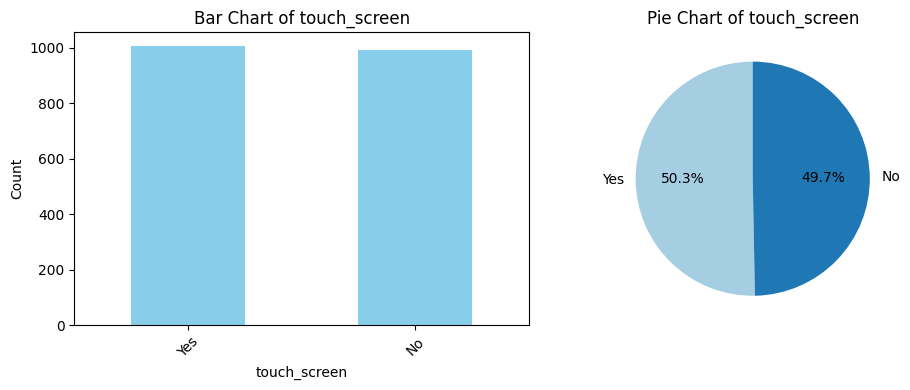

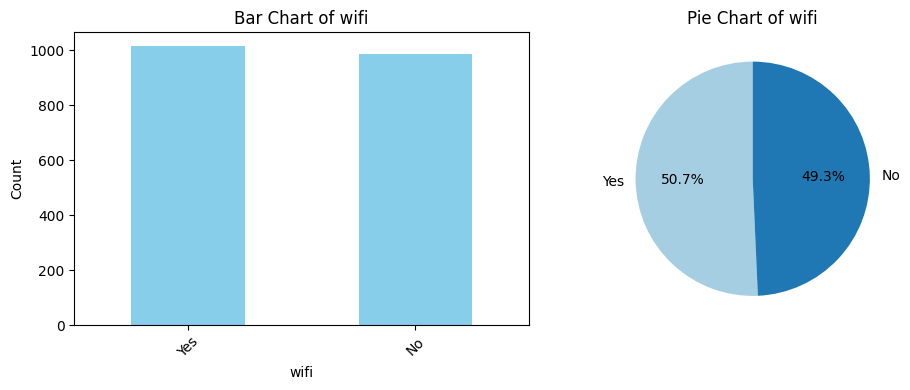

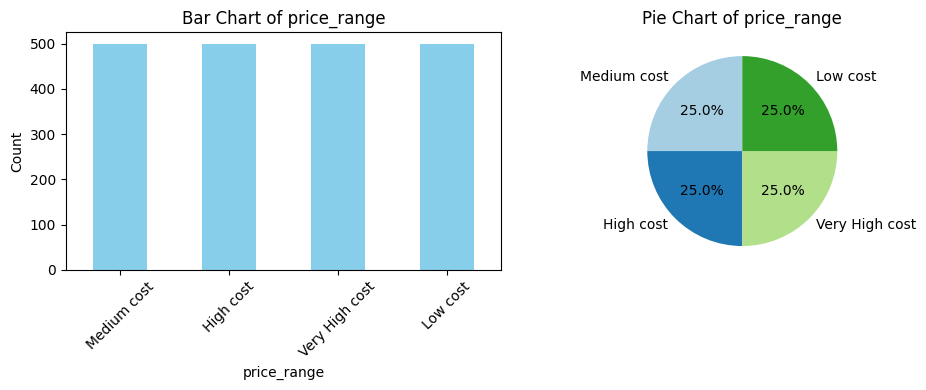

In [38]:
new_obj_cols = df.select_dtypes(include='object')

# Visualisasi kolom bertipe object menggunakan bar chart dan pie chart
for col in new_obj_cols.columns:
    plt.figure(figsize=(10, 4))
    # Bar chart
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [39]:
# Cek data kosong
total_na = df.isna().sum()

def delete_na(total_na, df):
    if len(total_na) > 0:
        df = df.dropna(axis=0)

    return df

df = delete_na(total_na, df)

Tidak ada data kosong, maka tidak ada proses penghapusan data kosong

## 2. Menghapus Data Duplicate

In [40]:
total_dups = df.duplicated().sum()

def delete_dups(total_dups, df):
    if total_dups > 0:
        df = df.drop_duplicates(axis=0)

    return df

Tidak ada data duplikat, maka tidak ada proses penghapusan data duplikasi

## 3. Encoding Fitur Objek

In [41]:
remain_object_cols = df.select_dtypes(include='object')

for col in remain_object_cols.columns:
    print(f"Nilai unik Kolom {col}:")
    print("="*4)
    print(df[col].unique())
    print("="*4)

Nilai unik Kolom Bluetooh:
====
['No' 'Yes']
====
Nilai unik Kolom Dual_sim:
====
['No' 'Yes']
====
Nilai unik Kolom 4G:
====
['No' 'Yes']
====
Nilai unik Kolom 3G:
====
['No' 'Yes']
====
Nilai unik Kolom touch_screen:
====
['No' 'Yes']
====
Nilai unik Kolom wifi:
====
['Yes' 'No']
====
Nilai unik Kolom price_range:
====
['Medium cost' 'High cost' 'Very High cost' 'Low cost']
====


In [42]:
# Proses Encoding
binary_cat = {'No': 0, 'Yes': 1}
target_cat = {"Low cost": 0, "Medium cost": 1,
              "High cost": 2, "Very High cost": 3}

encoders = {'Binary_Cat': binary_cat,
            'Target_Cat': target_cat}

target_col = 'price_range'

def encoding_object_feat(remain_obj_cols, target_col, all_cats):
    for_encode_cols = remain_obj_cols.columns
    
    for col in for_encode_cols:
        scaler = all_cats['Binary_Cat'] if col != target_col else all_cats['Target_Cat']
        df[col] = df[col].map(scaler)

    return df

df = encoding_object_feat(remain_object_cols, target_col, encoders)

In [43]:
df.head()

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1.0,0,7.0,6.0,188.0,2,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021.0,1,0.5,1,0.0,1,53.0,7.0,136.0,3,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563.0,1,0.5,1,2.0,1,41.0,9.0,145.0,5,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615.0,1,2.5,0,0.0,0,10.0,8.0,131.0,6,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821.0,1,1.2,0,13.0,1,44.0,6.0,141.0,2,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


## 4. Normalisasi atau Standarisasi Fitur

### Cek Korelasi Fitur

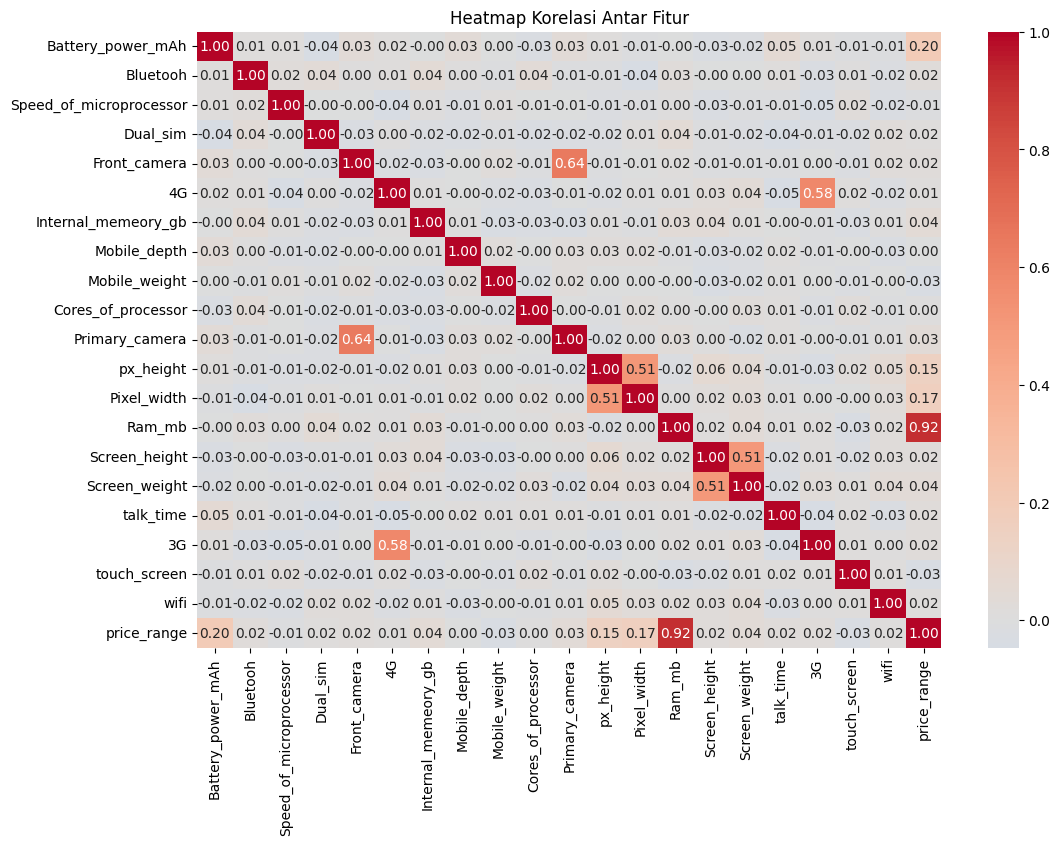

In [44]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,     
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [45]:
feature_target_corr = df.corr(numeric_only=True)[[target_col]].drop(index=target_col)
feature_target_corr = feature_target_corr.sort_values(by=target_col, ascending=False)

feature_target_corr

,price_range
Ram_mb,0.917046
Battery_power_mAh,0.200723
Pixel_width,0.165818
px_height,0.148858
Internal_memeory_gb,0.044435
Screen_weight,0.038711
Primary_camera,0.033599
3G,0.023611
Screen_height,0.022986
Front_camera,0.021998


### Standarisasi

In [46]:
df[numeric_cols].describe()

,Battery_power_mAh,Speed_of_microprocessor,Front_camera,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,Primary_camera,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,5.017500,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,2.884155,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,1.000000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,2.000000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,5.000000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,8.000000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,10.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


**Standarisasi Kolom Range Spreading**

Ditandai dengan standar deviasi yang lebih tinggi dari rata-rata setiap fitur yang ada. Serta korelasi yang cukup merepresentasikan hubungan dengan fitur target.

In [47]:
std_scaler = StandardScaler()

def scale_with_std_scaler(cols, df, std_scaler):
    df[cols] = std_scaler.fit_transform(df[cols])
    return df

In [48]:
col_to_scale = ['Ram_mb', 'Battery_power_mAh', 'Pixel_width', 'px_height']

df = scale_with_std_scaler(col_to_scale, df, std_scaler)

In [49]:
df.head()

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,-0.902597,0,2.2,0,1.0,0,7.0,6.0,188.0,2,...,-1.408949,-1.146784,0.391703,9.0,7.0,19,0,0,1,1
1,-0.495139,1,0.5,1,0.0,1,53.0,7.0,136.0,3,...,0.585778,1.704465,0.467317,17.0,3.0,7,1,1,0,2
2,-1.537686,1,0.5,1,2.0,1,41.0,9.0,145.0,5,...,1.392684,1.074968,0.441498,11.0,2.0,9,1,1,0,2
3,-1.419319,1,2.5,0,0.0,0,10.0,8.0,131.0,6,...,1.286750,1.236971,0.594569,16.0,8.0,11,1,0,0,2
4,1.325906,1,1.2,0,13.0,1,44.0,6.0,141.0,2,...,1.268718,-0.091452,-0.657666,8.0,2.0,15,1,1,0,1


## 5. Deteksi dan Penanganan Outliers

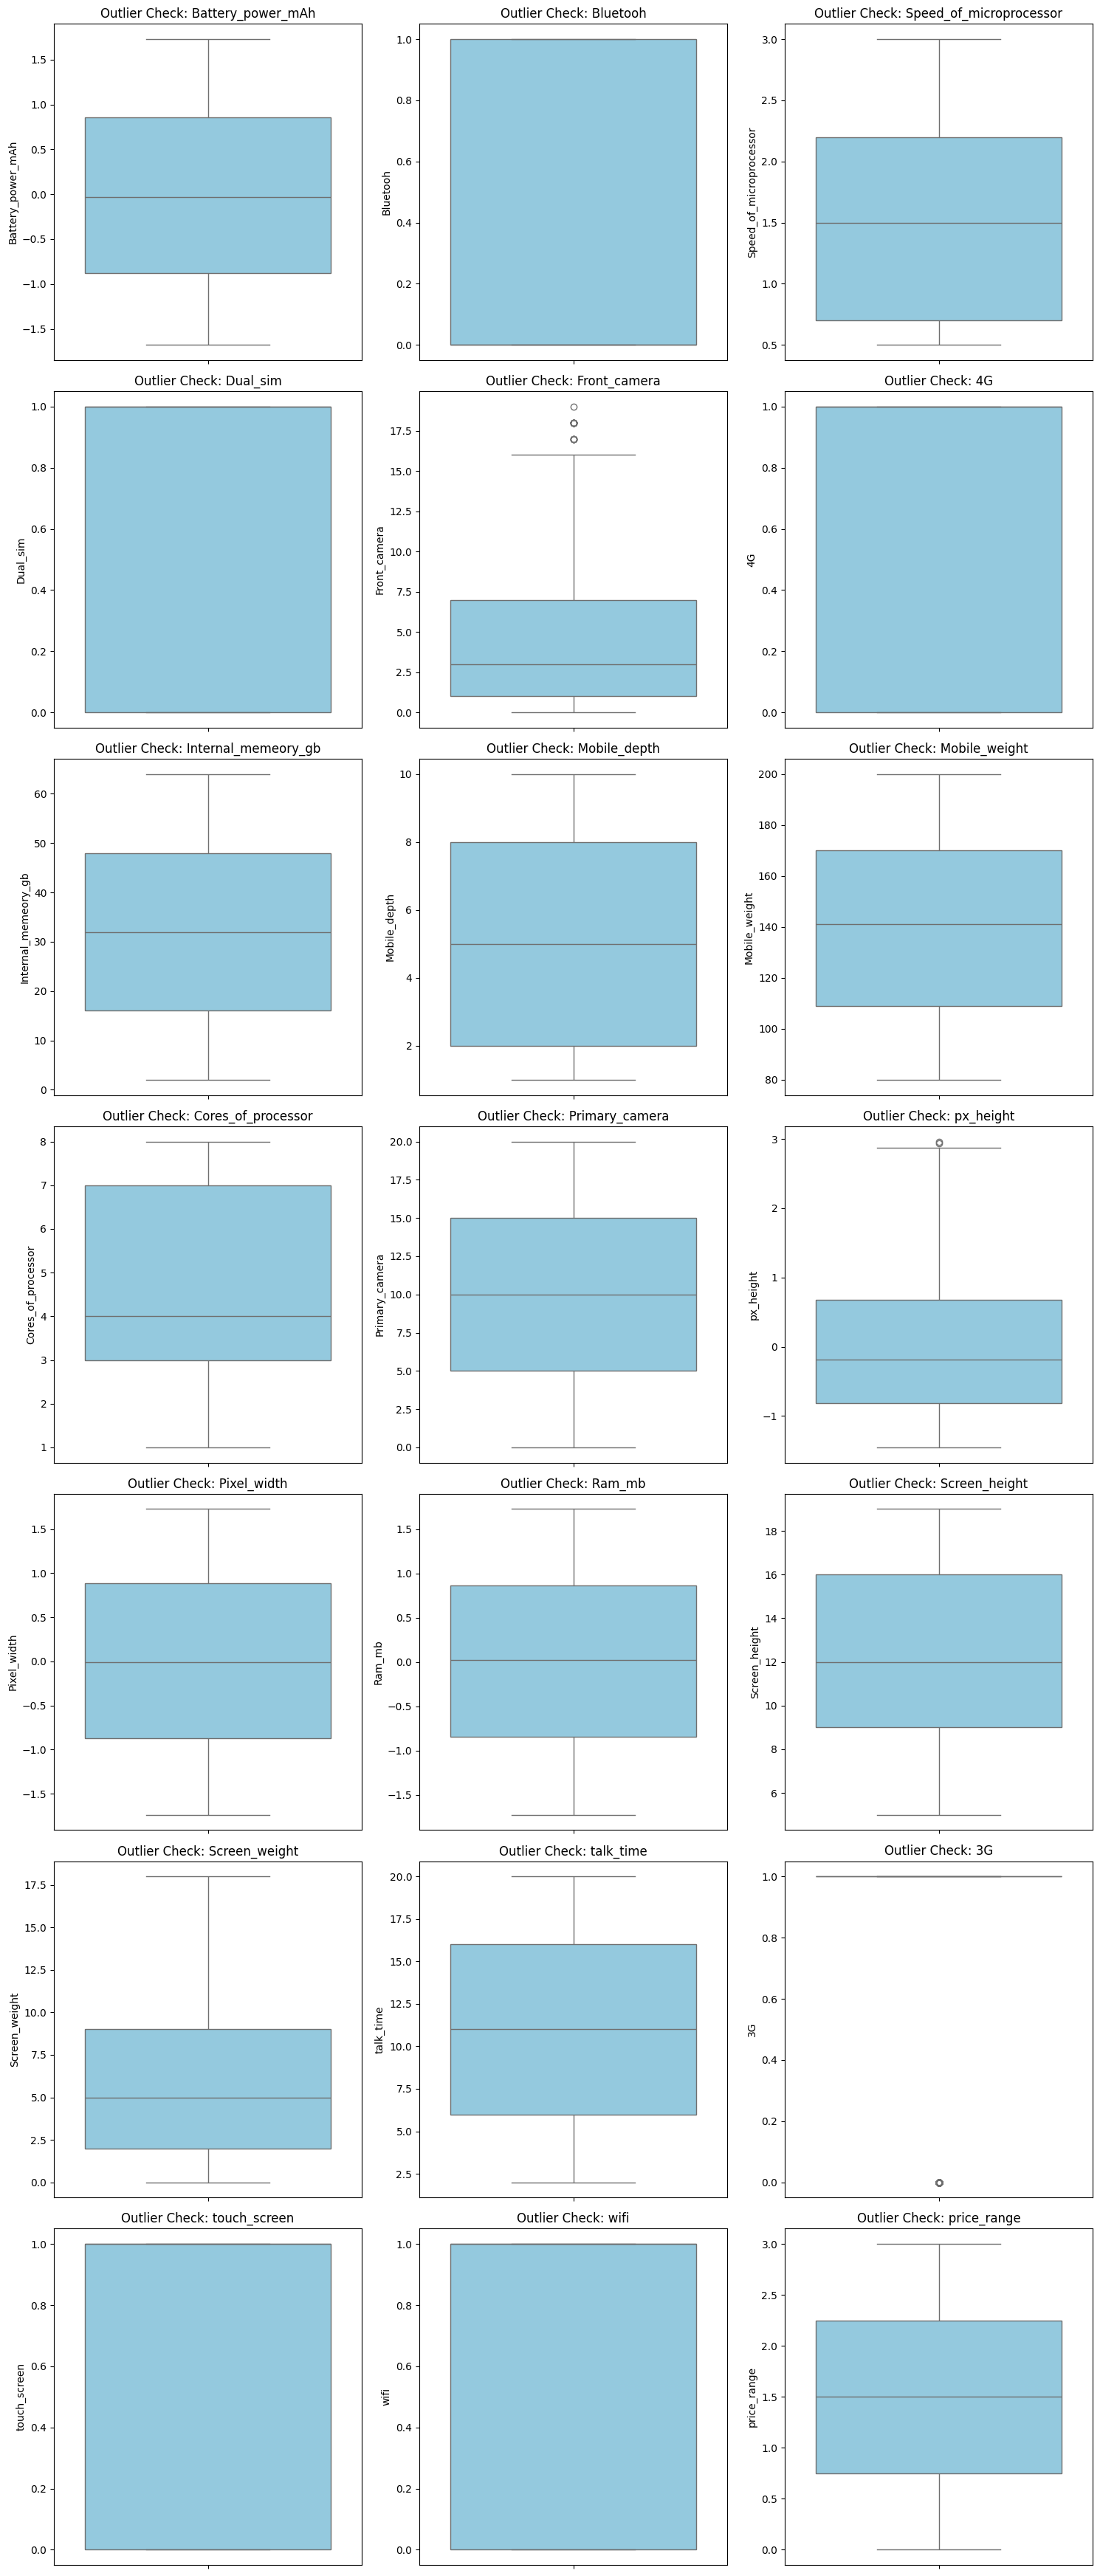

In [50]:
num_cols = df.select_dtypes(exclude='object').columns

def visualize_outliers(n_cols: int = 3,
                       figsz_x: int = 15,
                       figsz_y: int = 5,
                       df: pd.DataFrame = df):

    n_cols = n_cols
    n_rows = int(np.ceil(len(num_cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsz_x, figsz_y * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
        axes[i].set_title(f"Outlier Check: {col}")

    # hapus subplot kosong jika jumlah kolom < n_rows*n_cols
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

visualize_outliers()

In [51]:
def remove_outliers_iqr(data: pd.DataFrame = df, cols: list = []) -> pd.DataFrame:
    cleaned_data = data.copy()
    for col in cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower) & (cleaned_data[col] <= upper)]
    return cleaned_data

df_cleaned = remove_outliers_iqr(df, num_cols)

print(f"Sebelum hapus outliers: {df.shape}")
print(f"Setelah hapus outliers: {df_cleaned.shape}")

Sebelum hapus outliers: (2000, 21)
Setelah hapus outliers: (1506, 21)


## 6. Reduksi Dimensi (Dengan LDA)

In [52]:
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

def reduction_with_lda(X: pd.Series, 
                       y: pd.Series,
                       n_comp: int = 3) -> pd.DataFrame:

    lda = LinearDiscriminantAnalysis(n_components=n_comp)
    X_lda = lda.fit_transform(X, y)

    return X_lda

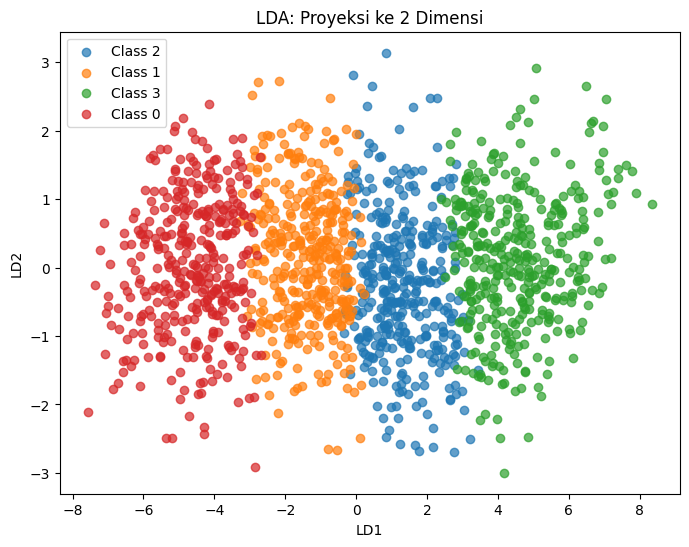

In [53]:
X_lda = reduction_with_lda(X, y, 3)

plt.figure(figsize=(8,6))
for label in y.unique():
    plt.scatter(
        X_lda[y == label, 0],
        X_lda[y == label, 1],
        label=f"Class {label}",
        alpha=0.7
    )

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA: Proyeksi ke 2 Dimensi")
plt.legend()
plt.show()